In [1]:
import random, numpy as np, pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import os

## Loading class module

In [2]:
%run ../stochastic_fractal_m.py

In [21]:
alphap = 2.5  # any real positive value larger than 0.5, but anaylytical plot exists only for alpha=1,2,3
probp = 0.75 # any value between 0 and 1

ensemble_sizep = 500
min_iterationp = 100_000
bin_sizep = 0.0001

In [22]:
expon = 2 * alphap - 1

## Defining directory

In [23]:
dir_data = "../data/alpha{}/".format(alphap)
dir_fig  ="../figures/alpha{}/".format(alphap)


## While testing
dir_data = "../data/temp/alpha{}/".format(alphap)
dir_fig  ="../figures/temp/alpha{}/".format(alphap)

# create directory if it does not exists
for dir_name in [dir_data, dir_fig]:
    if not os.path.isdir(dir_name):
        os.mkdir(dir_name)
        print("directory ", dir_name, " is created")
    else:
        print("directory ", dir_name, " exists")

directory  ../data/temp/alpha2.5/  exists
directory  ../figures/temp/alpha2.5/  exists


In [24]:
figure_name = dir_fig + "pn_data_coll_alpha_{}.pdf".format(alphap)

## Simulation using class

In [25]:
stochastic_frag = TrueLengths(alpha=alphap, probability=probp)

kwargs  {'alpha': 2.5, 'probability': 0.75}
Turning on logging


In [26]:
# total_iteration = 10000
# lengths_enselbme = stochastic_frag.run_ensemble(ensemble_sizep, total_iteration)

In [27]:
ana_soln = AnalyticSoln()

## Other functions

In [28]:
def bin_maker(max_value, bin_number):
    bin_size = max_value/bin_number
    bins = [0.]
    for i in range(bin_number):
        bin_edge = (i+1)*bin_size
        bins.append(bin_edge)
        pass
    return bins

In [29]:
def histrogram_data(data, bin_size = bin_sizep):
    bin_number = int((np.max(data) - np.min(data))//bin_size) + 1
    y, x = np.histogram(data, bins = bin_number)
    return x[1:], y

## fitting data

$\phi \equiv \text{simulation}$
$\phi^{(th)} \equiv \text{theoritical or analytical}$

$$cost = \sum_t \sum_i (b*\phi_{i t} - \phi_{i t}^{(th)})^2 \$$

we need to minimize $cost$. We get the value of $b$ as

$$b = \frac{\sum_t \sum_i \phi_{i t} \phi_{i t}^{(th)}}{\sum_t \sum_i \phi_{i t}^2}$$

In [30]:
def fitting_parameter(given_array,ref_array):
    a1 = np.multiply(given_array,ref_array)
    a2 = np.multiply(given_array,given_array)
    a1_sum = np.sum(a1)
    a2_sum = np.sum(a2)
    return a1_sum, a2_sum

## Simulation  and plot

In [31]:
def plot_data_simulation(total_iteration, ens_data):
    """
    data collapse points from simulation
    """
    df = ana_soln.find_df(alphap,probp)
#     ens_data = stochastic_frag.run_ensemble(ensemble_sizep, total_iteration)  # from class
    x,y = histrogram_data(ens_data)
    xi = x*total_iteration**(1/(2*alphap-1))
    phi = y/(total_iteration**((1+df)/(2*alphap-1)))

    return xi, phi 

In [32]:
def plot_data_fitted(total_iteration, ens_data):
    xi, phi  = plot_data_simulation(total_iteration, ens_data)
    xi, phi_analytic = ana_soln.phi_list(alphap,probp,xi)
    a1_sum, a2_sum = fitting_parameter(phi,phi_analytic)
    return xi, phi, a1_sum, a2_sum

In [33]:
# def plot_data(total_iteration):
#     df = ana_soln.find_df(alphap,probp)
    
#     # doing the simulation here
#     ens_data = stochastic_frag.run_ensemble(ensemble_sizep, total_iteration)  # from class
#     x,y = histrogram_data(ens_data)
#     xi = x*total_iteration**(1/(2*alphap-1))
#     phi = y/(total_iteration**((1+df)/(2*alphap-1)))
#     xi, phi_analytic = ana_soln.phi_list(alphap,probp,xi)  # from class
# #     print(len(phi_analytic))
#     a1_sum, a2_sum = fitting_parameter(phi, phi_analytic)
#     print(a1_sum, ", ", a2_sum)
#     return xi, phi, a1_sum, a2_sum

## Simulation

In [34]:
ens_data_dct = dict()
for i in range(3):
    time_t = min_iterationp*(i+1)
    ens_data_dct[time_t] = stochastic_frag.run_ensemble(ensemble_sizep, time_t)  # from class
    print(time_t)

realization  5  . Time spent  0.4663114547729492  sec
realization  10  . Time spent  0.4835522174835205  sec
realization  15  . Time spent  0.4735448360443115  sec
realization  20  . Time spent  0.4688599109649658  sec
realization  25  . Time spent  0.46401333808898926  sec
realization  30  . Time spent  0.44285106658935547  sec
realization  35  . Time spent  0.4413297176361084  sec
realization  40  . Time spent  0.4856886863708496  sec
realization  45  . Time spent  0.4466843605041504  sec
realization  50  . Time spent  0.4548778533935547  sec
realization  55  . Time spent  0.47296142578125  sec
realization  60  . Time spent  0.494931697845459  sec
realization  65  . Time spent  0.4886207580566406  sec
realization  70  . Time spent  0.47919416427612305  sec
realization  75  . Time spent  0.4779796600341797  sec
realization  80  . Time spent  0.5559196472167969  sec
realization  85  . Time spent  0.44960570335388184  sec
realization  90  . Time spent  0.46431732177734375  sec
realizati

realization  235  . Time spent  0.8999812602996826  sec
realization  240  . Time spent  0.895028829574585  sec
realization  245  . Time spent  0.8783657550811768  sec
realization  250  . Time spent  1.0114107131958008  sec
realization  255  . Time spent  0.9713454246520996  sec
realization  260  . Time spent  0.9022946357727051  sec
realization  265  . Time spent  0.917823314666748  sec
realization  270  . Time spent  0.904045820236206  sec
realization  275  . Time spent  0.8997986316680908  sec
realization  280  . Time spent  1.039015531539917  sec
realization  285  . Time spent  0.8913290500640869  sec
realization  290  . Time spent  0.8758268356323242  sec
realization  295  . Time spent  0.8848633766174316  sec
realization  300  . Time spent  0.917137622833252  sec
realization  305  . Time spent  0.887444019317627  sec
realization  310  . Time spent  0.8888647556304932  sec
realization  315  . Time spent  0.887340784072876  sec
realization  320  . Time spent  0.8877613544464111  sec

realization  470  . Time spent  1.279236078262329  sec
realization  475  . Time spent  1.2782056331634521  sec
realization  480  . Time spent  1.2952916622161865  sec
realization  485  . Time spent  1.2959802150726318  sec
realization  490  . Time spent  1.302389144897461  sec
realization  495  . Time spent  1.2869946956634521  sec
realization  500  . Time spent  1.3084735870361328  sec
Total time spent  134.21948218345642  sec
300000


In [35]:
data_dict = {}
a1_sum, a2_sum = 0,0
for time_t in ens_data_dct.keys():
   
    if alphap in [1,2,3]:
        print("alpha is within known values")
        xi, phi, a1, a2 = plot_data_fitted(time_t, ens_data_dct[time_t])
    else:
        xi, phi = plot_data_simulation(time_t,  ens_data_dct[time_t])
        a1, a2 = 1, 1
        pass
    data_dict[time_t]=[xi,phi]
    a1_sum += a1
    a2_sum += a2
    
for i in range(3):
    time_t = min_iterationp*(i+1)
    data_dict[time_t][1]*=(a1_sum/a2_sum)

In [36]:
# print(data_dict.keys())
# print(a1_sum)
# print(a2_sum)

### Saving data for later use

In [37]:
signature = 'data_collapse_alpha_{}_t_{}k'
for time_t in data_dict.keys():
    x,y = data_dict[time_t]
    file_name = signature.format(alphap, int(time_t//1000))
#     np.savetxt(dir_data+file_name,np.c_[x,y])

## Plotting

../figures/temp/alpha2.5/pn_data_coll_alpha_2.5.pdf


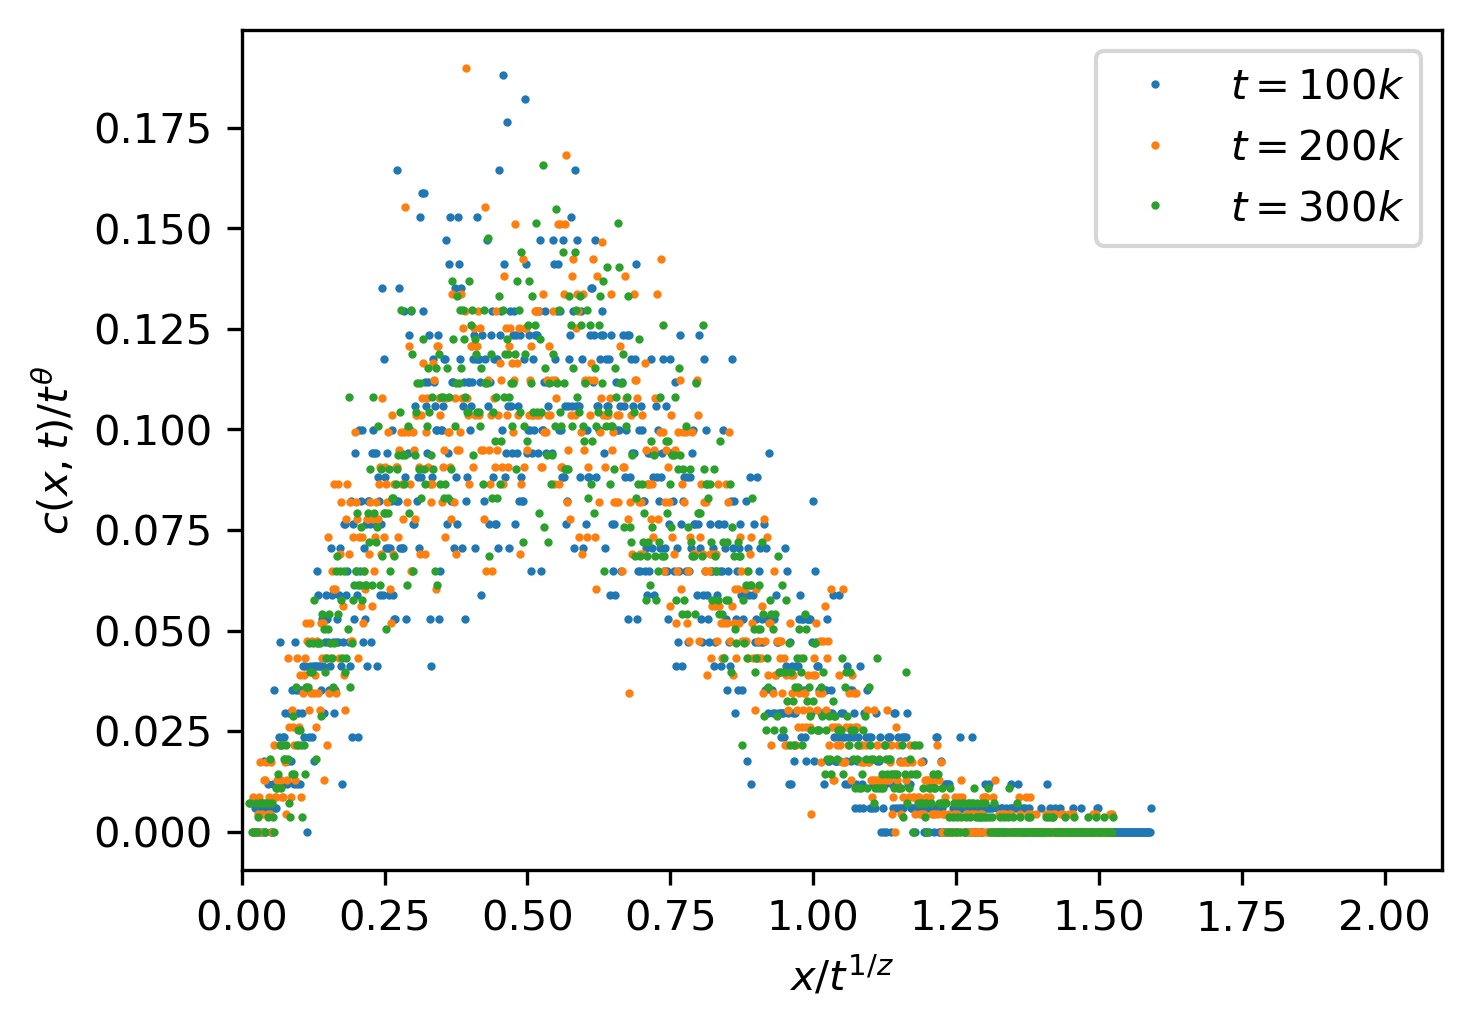

In [38]:
fig, axes = plt.subplots(1,1,figsize = (5,3.5),dpi = 300)

for i in range(3):
    time_t = min_iterationp*(i+1)
    x,y = data_dict[time_t]
    plt.plot(x, y,"o", markersize=1,label=r"$t={}k$".format(str(int(time_t//1000))))

if alphap in [1,2,3]:
    xi_th = np.linspace(0,2,1000)
    xis, phi_th = ana_soln.phi_list(alphap,probp,xi_th)  # from class
    plt.plot(xi_th, phi_th,color='black',linewidth=0.5)

plt.legend(loc=1)
plt.xlabel(r"$x/t^{1/z}$")
plt.ylabel(r"$c(x,t)/t^\theta$")
plt.xlim([0, 2.1])
axes.set_position([0.15, 0.15, 0.8, 0.8])

print(figure_name)
# plt.savefig(figure_name)